### Introduction

If you want download the dataset so you can easily download from this link <https://www.kaggle.com/priyanshusahu23/winequality/download


Let's start with importing some modules

In [114]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Analyzing Dataset

We have to check what technical information contained in the data.

In [115]:
dataset = pd.read_csv('wine-quality.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


you can see that several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.


* volatile acidity :   Volatile acidity is the gaseous acids present in wine.
* fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
* residual sugar :   Amount of sugar left after fermentation.
* citric acid :    It is weak organic acid, found in citrus fruits naturally.
* chlorides :   Amount of salt present in wine.
* free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
total sulfur dioxide 
* pH :   In wine pH is used for checking acidity
density 
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.


Rather than chemical features, you can see that there is one feature named Type it contains the types of wine we here discuss on red and white wine, the percent of red wine is greater than white.

In [116]:
dataset.describe

<bound method NDFrame.describe of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  tot

### Exploratory Data Analysis

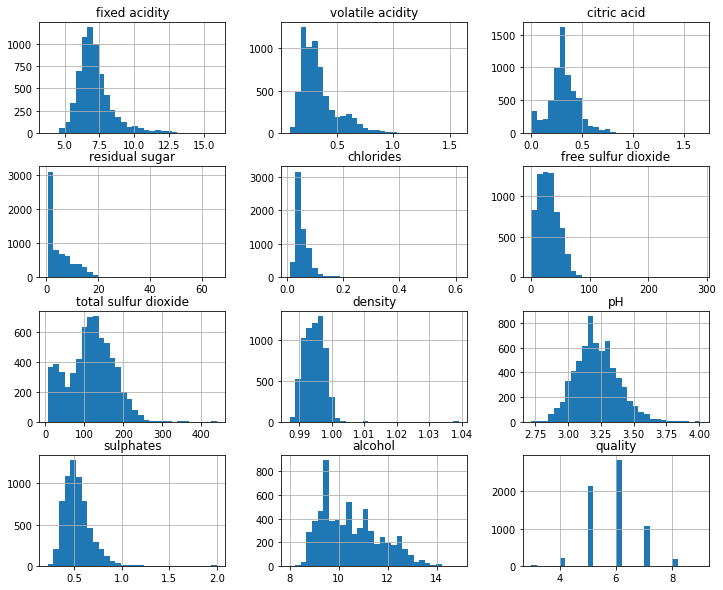

In [117]:
dataset.hist(bins=30,figsize=(12, 10))
plt.show()

### Correlation

<AxesSubplot:>

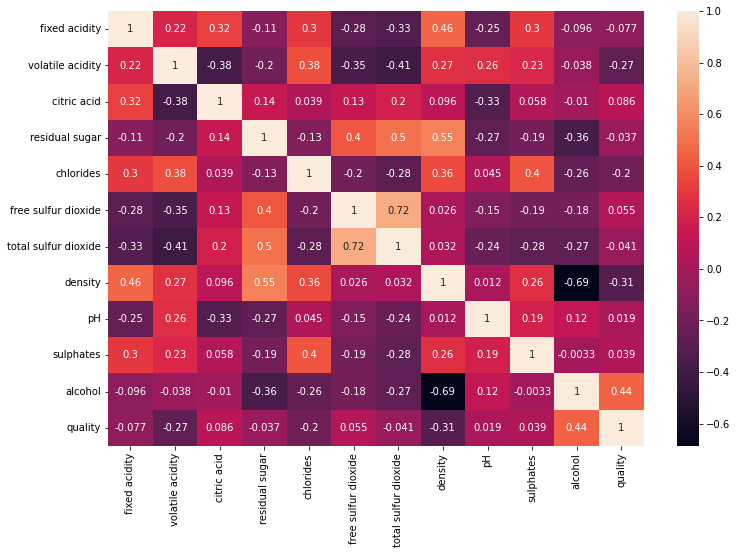

In [118]:
plt.figure(figsize=(12, 8))
sb.heatmap(dataset.corr(),annot=True)

### Handle Missing Values

In [119]:
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [120]:
dataset.update(dataset.fillna(dataset.mean(numeric_only=True)))

checking values again

In [121]:
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
dataset['good_quality'] = [1 if x>=7 else 0 for x in dataset['quality']]
dataset['good_quality'].value_counts()

0    5220
1    1277
Name: good_quality, dtype: int64

#### Making Dependent and Independent variable

In [123]:
x = dataset.drop(['good_quality', 'quality'], axis=1)
y = dataset['good_quality']

### Data Preprocessing

In [124]:
from sklearn.preprocessing import LabelEncoder
x_features = x
for i in x.columns:
    x[i] = LabelEncoder().fit_transform(x[i])

### Splitting our Dataset

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

## Modelling

##### I will use four different machine learning models :
1. Decision Tree
2. Gradient Boost
3. XGBoost
4. RandomForest

#### Model 1 : Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

DT = DecisionTreeClassifier(random_state=12)

fit_DT_model = DT.fit(x_train, y_train)
# predicting score
DT_model_score = DT.score(x_test, y_test)
print('score of model is : ', DT_model_score)
# display error rate
print('calculating the error')
# calculating mean squared error
y_predict = DT.predict(x_test)
DT_MSE = mean_squared_error(y_test, y_predict)
# calculating root mean squared error
DT_RMSE = np.sqrt(DT_MSE)
# display MSE
print('mean squared error is : ', DT_MSE)
# display RMSE
print('root mean squared error is : ', DT_RMSE)
print("\nclassification_report : ")
print(classification_report(y_predict, y_test))

score of model is :  0.8361538461538461
calculating the error
mean squared error is :  0.16384615384615384
root mean squared error is :  0.4047791420591652
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1036
           1       0.60      0.60      0.60       264

    accuracy                           0.84      1300
   macro avg       0.75      0.75      0.75      1300
weighted avg       0.84      0.84      0.84      1300



#### Model 2 : Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier


GB = GradientBoostingClassifier(random_state=43)

fit_GB_model = GB.fit(x_train, y_train)
# predicting score
GB_model_score = GB.score(x_test, y_test)
print('score of model is : ', GB_model_score)
# display error rate
print('calculating the error')
# calculating mean squared error
y_predict = GB.predict(x_test)
GB_MSE = mean_squared_error(y_test, y_predict)
# calculating root mean squared error
GB_RMSE = np.sqrt(GB_MSE)
# display MSE
print('mean squared error is : ', GB_MSE)
# display RMSE
print('root mean squared error is : ', GB_RMSE)
print("\nclassification_report : ")
print(classification_report(y_predict, y_test))

score of model is :  0.8307692307692308
calculating the error
mean squared error is :  0.16923076923076924
root mean squared error is :  0.41137667560372115
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1157
           1       0.36      0.66      0.46       143

    accuracy                           0.83      1300
   macro avg       0.65      0.76      0.68      1300
weighted avg       0.89      0.83      0.85      1300



#### Model 3 : XGBoost 

In [129]:
import xgboost as xgb

XGB = xgb.XGBClassifier(random_state=43, use_label_encoder=False)

fit_XGB_model = XGB.fit(x_train, y_train)
# predicting score
XGB_model_score = XGB.score(x_test, y_test)
print('score of model is : ', XGB_model_score)
# display error rate
print('calculating the error')
# calculating mean squared error
y_predict = XGB.predict(x_test)
XGB_MSE = mean_squared_error(y_test, y_predict)
# calculating root mean squared error
XGB_RMSE = np.sqrt(XGB_MSE)
# display MSE
print('mean squared error is : ', XGB_MSE)
# display RMSE
print('root mean squared error is : ', XGB_RMSE)
print("\nclassification_report : ")
print(classification_report(y_predict, y_test))

[22:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  0.8769230769230769
calculating the error
mean squared error is :  0.12307692307692308
root mean squared error is :  0.35082320772281167
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1117
           1       0.54      0.79      0.64       183

    accuracy                           0.88      1300
   macro avg       0.75      0.84      0.79      1300
weighted avg       0.90      0.88      0.89      1300



#### Model 4 : RandomForestClassifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=1)

fit_RF_model = RF.fit(x_train, y_train)
# predicting score
RF_model_score = RF.score(x_test, y_test)
print('score of model is : ', RF_model_score)
# display error rate
print('calculating the error')
# calculating mean squared error
y_predict = RF.predict(x_test)
RF_MSE = mean_squared_error(y_test, y_predict)
# calculating root mean squared error
RF_RMSE = np.sqrt(RF_MSE)
# display MSE
print('mean squared error is : ', RF_MSE)
# display RMSE
print('root mean squared error is : ', RF_RMSE)
print("\nclassification_report : ")
print(classification_report(y_predict, y_test))

score of model is :  0.8876923076923077
calculating the error
mean squared error is :  0.1123076923076923
root mean squared error is :  0.3351233986275687
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1123
           1       0.56      0.84      0.67       177

    accuracy                           0.89      1300
   macro avg       0.77      0.87      0.80      1300
weighted avg       0.92      0.89      0.90      1300



In [132]:
# We can see that RandomForest gives us the 89% of accuracy
# Which was considered as the best accuracy
x_predict = list(RF.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df)

,predicted_values,original_values
3607,0,0
3985,0,0
3465,0,0
1749,0,0
641,0,0
...,...,...
6081,0,0
5019,0,0
3154,1,0
6032,1,1


In [ ]:
import pickle
file = 'wine_quality_model'
# save the file
save = pickle.dump(RF, open(file, 'wb'))